#Cross-section tool

##Description of exercise

In this excercise we are going to make a function for computing the cross-section of a raster (i.e. an elevation profile).

The main functionality is already available to us, using a Scipy map_coordinates function below. However, as it stands this only works using pixel coordinates. Pixel coordinates (according to python) start at 0 and extend to the number of elements in any dimension. 

For this tool to be useful, we want to input geographic (or even projected coordinates).
The task is to provide this extra functionality and build a python __function__ around this. 

In [1]:
%matplotlib inline
import os
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
import scipy.misc # ADDED THIS LINE
import rasterio

In [2]:
filename = os.path.join('../data/','rasters','flinders.tif')
filename

'../data/rasters/flinders.tif'

In [3]:
dataset1 = rasterio.open(filename)

image = dataset1.read_band(1)

In [6]:
image.min()

54.663895

In [33]:
type(dataset1)

rasterio._io.RasterReader

In [10]:
dataset1.bounds

BoundingBox(left=137.99994444444445, bottom=-31.555611111111112, right=138.55561111111112, top=-30.999944444444445)

In [8]:
#Getting x and y  vectors for the coordinates

x= np.arange(dataset1.bounds[0], dataset1.bounds[2], dataset1.width)
y = np.arange(dataset1.bounds[1], dataset1.bounds[3], dataset1.height)


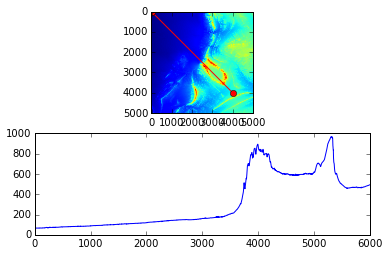

In [11]:
z = image

#-- Extract the line...
# Make a line with "num" points...
x0, y0 = 5, 5 # These are in _pixel_ coordinates!!
x1, y1 = 4000, 4000
num = 6000
x, y = np.linspace(x0, x1, num), np.linspace(y0, y1, num)

# Extract the values along the line, using cubic interpolation
zi = scipy.ndimage.map_coordinates(np.transpose(z), np.vstack((x,y))) # THIS SEEMS TO WORK CORRECTLY

#-- Plot...
fig, axes = plt.subplots(nrows=2)
axes[0].imshow(z)
axes[0].plot([x0, x1], [y0, y1], 'ro-')
axes[0].axis('image')

axes[1].plot(zi)

plt.show()


In [30]:
dataset1.bounds[2] - dataset1.bounds[0]
image.shape[0]
translatex = dataset1.bounds[0]
translatex
dataset1.bounds[3]

-30.999944444444445

In [31]:
scale_factor = image.shape[0]/(dataset1.bounds[2] - dataset1.bounds[0])
translatex = dataset1.bounds[0]
translatey = dataset1.bounds[1]

def geographic_to_pixel(lon,lat):
    np_x = (lon - translatex)*scale_factor
    np_y = (lat - translatey)*scale_factor
    return int(np_x), int(np_y)    

In [32]:
geographic_to_pixel(dataset1.bounds[2], dataset1.bounds[3])

(5001, 5001)

In [83]:
def cross_section(Raster, lons, lats):
    """
    Function to do elevation profile
    Input: filename...GDAL readable Raster
    usage: cross_section(filename, lons = lons, lats = lats)
    """
    #############
    #import libraries
    #############
    import os
    import math
    import numpy as np
    import scipy.ndimage
    import matplotlib.pyplot as plt
    import scipy.misc # ADDED THIS LINE
    import rasterio

    #############
    #helper functions
    #############
    dataset = rasterio.open(filename)
    image = dataset1.read_band(1)
    scale_factor = image.shape[0]/(dataset1.bounds[2] - dataset1.bounds[0])
    translatex = dataset1.bounds[0]
    translatey = dataset1.bounds[1]
    def geographic_to_pixel(lon,lat):
        np_x = (lon - translatex)*scale_factor
        np_y = (lat - translatey)*scale_factor
        return int(np_x), int(np_y)
    Rasterio_object = rasterio.open(filename)

    res = 6*10. #Approx 10 times the Raster resolution, in meters
    res_g = res /111000.* res
    num_points = translatex/res_g
    #############
    #Error checks on bounds
    #############
    #
    #To Do...
    #
    #############
    #Get pixel values
    #############
    npx0, npy0 = geographic_to_pixel(lons[0], lats[0])
    npx1, npy1 = geographic_to_pixel(lons[1], lats[1])
    #############
    #Make line in pixel space
    #############
    x0, y0 = 5, 5 # These are in _pixel_ coordinates!!
    x1, y1 = 4000, 4000
    num = 6000
    x, y = np.linspace(npx0, npx1, num_points), np.linspace(npy0, npy1, num_points)
    # Extract the values along the line, using cubic interpolation
    zi = scipy.ndimage.map_coordinates(np.transpose(image), np.vstack((x,y))) # THIS SEEMS TO WORK CORRECTLY
    #############
    #Plot
    #############
    #
    #Cartesian distance
    geo_dis = math.sqrt((abs(lons[1] - lons[0]))**2 + ((lats[1] - lats[0]))**2)
    km_dis = geo_dis*111.  #Highly approx
    dis_vec = np.linspace(0, km_dis, num_points)
    fig, axes = plt.subplots(nrows=2)
    axes[0].imshow(z)
    axes[0].plot([x0, x1], [y0, y1], 'ro-')
    axes[0].axis('image')
    axes[1].plot(dis_vec, zi)
    axes[1].set_ylabel('elevation (m)')
    axes[1].set_xlabel('distance (kms)')
    plt.show()

In [84]:
dataset1.bounds

BoundingBox(left=137.99994444444445, bottom=-31.555611111111112, right=138.55561111111112, top=-30.999944444444445)

In [85]:
filename

'../data/rasters/flinders.tif'

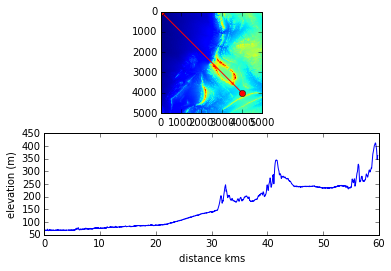

In [86]:
cross_section(filename, [138, 138.2], [-31.5, -31.])